<a href="https://colab.research.google.com/github/Vtzachis/Projects/blob/main/mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
from torch import nn, optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
transform = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])
train_data = MNIST(root="data", train=True, download=True, transform=transform)
test_data = MNIST(root="data", train=False, download=True, transform=transform)


In [15]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

In [16]:
model = nn.Sequential(
    nn.Conv2d(1, 32, 3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(32, 64, 3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(64 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
).to(device)

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
def train(model, loader):
    model.train()
    total_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [19]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

In [20]:
for epoch in range(5):
    loss = train(model, train_loader)
    acc = evaluate(model, test_loader)
    print(f"Epoch {epoch+1}: Loss={loss:.4f}, Accuracy={acc*100:.2f}%")


Epoch 1: Loss=0.1346, Accuracy=98.66%
Epoch 2: Loss=0.0419, Accuracy=98.90%
Epoch 3: Loss=0.0284, Accuracy=98.79%
Epoch 4: Loss=0.0213, Accuracy=99.14%
Epoch 5: Loss=0.0167, Accuracy=99.04%


In [21]:
model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
preds = outputs.argmax(dim=1)

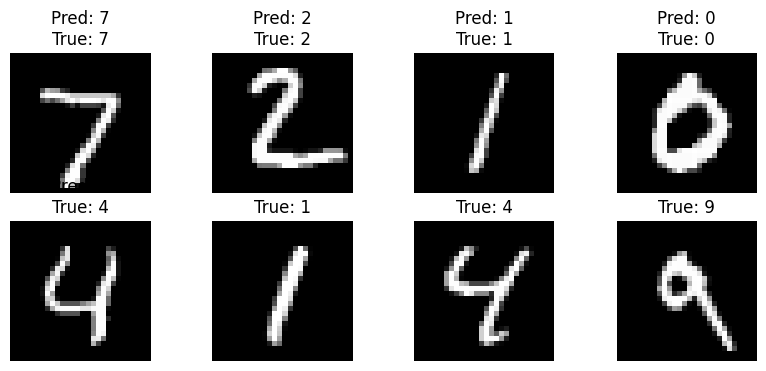

In [23]:
plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i].cpu().squeeze(), cmap='gray')
    plt.title(f"Pred: {preds[i].item()}\nTrue: {labels[i].item()}")
    plt.axis('off')
plt.show()